In [4]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 435.7 kB/s eta 0:01:29
   ---------------------------------------- 0.1/38.6 MB 656.4 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.6 MB 1.4 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.6/38.6 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.6 MB 2.7 MB/s eta 0:00:14
   - -------------------------------------- 1.2/38.6 MB 3.4 MB/s eta 0:00:11
   - --------------

In [5]:
import cv2
import numpy as np
import os

# Set the path to the folder containing the 40 folders with 10 images each
base_path = "C:/Users/shiva/OneDrive/Documents/faceimagesdataset"  # Replace with the actual path

# Initialize an empty list to store reshaped images
reshaped_images = []

# Iterate through each folder (40 folders)
for folder in range(1, 41):
    folder_path = os.path.join(base_path, f"s{folder}")

    # Iterate through each image in the folder (10 images)
    for image_num in range(1, 11):
        # Construct the path to the image
        image_path = os.path.join(folder_path, f"{image_num}.pgm")

        # Read the image using OpenCV
        img = cv2.imread(image_path, 0)  # 0 indicates grayscale

        # Reshape the image to a 1D array and append to the list
        reshaped_img = img.reshape(1, -1)
        reshaped_images.append(reshaped_img)

# Convert the list of reshaped images to a NumPy array
image_matrix = np.vstack(reshaped_images)

# The shape of the final matrix
print("Final matrix shape:", image_matrix.shape)


Final matrix shape: (400, 10304)


In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


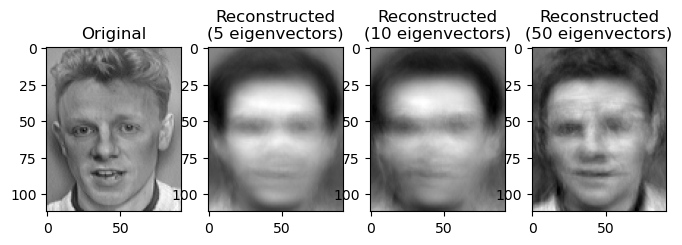

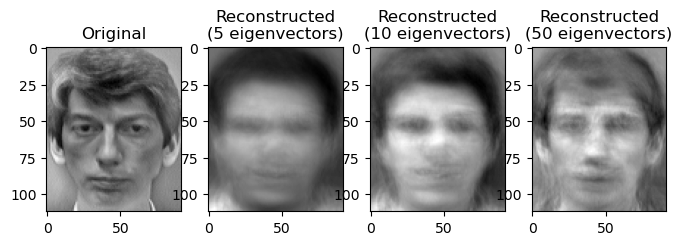

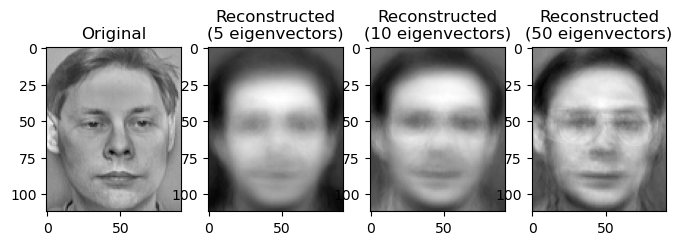

In [7]:
import numpy as np
import cv2
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the face images matrix (already reshaped)
# Assuming you have already loaded the images and created the image_matrix as shown in the previous example

# Calculate the mean image
mean_image = np.mean(image_matrix, axis=0)

# Center the data by subtracting the mean
centered_data = image_matrix - mean_image

# Perform PCA
n_components = 50  # Number of top eigenvectors
pca = PCA(n_components=n_components)
pca.fit(centered_data)

# Randomly pick 3 images for reconstruction
np.random.seed(42)  # Set seed for reproducibility
random_indices = np.random.choice(centered_data.shape[0], 3, replace=False)
selected_images = centered_data[random_indices, :]

# Reconstruct the images with 5, 10, and 50 eigenvectors
reconstructed_images = []
num_eigenvectors_list = [5, 10, 50]

for num_eigenvectors in num_eigenvectors_list:
    # Project the data onto the selected eigenvectors
    projected_data = pca.transform(selected_images)[:, :num_eigenvectors]
    
    # Reconstruct the images
    reconstructed_data = mean_image + np.dot(projected_data, pca.components_[:num_eigenvectors, :])
    
    reconstructed_images.append(reconstructed_data)

# Display the original and reconstructed images
for i in range(3):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(selected_images[i].reshape(112, 92), cmap='gray')
    plt.title('Original')
    
    for j, num_eigenvectors in enumerate(num_eigenvectors_list):
        plt.subplot(1, 4, j + 2)
        plt.imshow(reconstructed_images[j][i].reshape(112, 92), cmap='gray')
        plt.title(f'Reconstructed\n({num_eigenvectors} eigenvectors)')

    plt.show()
